# SpaceX Falcon 9 Data Analysis and Landing Prediction

## Imports

- **requests**: Used to make API requests to the SpaceX API.
- **pandas**: Used for data manipulation and analysis in the form of DataFrames.
- **numpy**: Used for numerical computations (not used in the provided code).
- **datetime**: Used for working with dates and times (not used in the provided code).
- **seaborn**: Used for data visualization (not used in the provided code).
- **matplotlib.pyplot**: Used for data visualization (not used in the provided code).
- **sklearn**: Contains machine learning libraries (not used in the provided code).

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
url = 'https://api.spacexdata.com/v4/'

## Function Definitions

- **getBoosters(data)**:
  This function iterates through the rocket entries in the data and retrieves information about the boosters using the SpaceX API. It stores the booster names in a list named `BoosterVersion`.

- **getLaunchSite(data)**:
  This function iterates through the launchpad entries in the data and retrieves information about the launch sites using the SpaceX API. It stores the longitude, latitude, and launch site name in separate lists named `Longitude`, `Latitude`, and `LaunchSite`.

- **getPayloadData(data)**:
  This function iterates through the payloads entries in the data and retrieves information about the payloads using the SpaceX API. It stores the payload mass and orbit in separate lists named `PayloadMass` and `Orbit`.

- **getCoreData(data)**:
  This function iterates through the cores entries in the data and retrieves information about the cores used in the launches. It stores information like block version, reuse count, serial number, landing success, flight number, grid fins, reused status, landing legs, and landing pad in separate lists.


In [3]:
def getBoosters(data):
  for x in data['rocket']:
    res = requests.get(url+ 'rockets/' + str(x)).json()
    BoosterVersion.append(res['name'])

In [4]:
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get(url + "launchpads/" + str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

In [5]:
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get(url + "payloads/" + load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [6]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get(url + "cores/" + core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

## Data Acquisition

- The script defines the URL for the SpaceX launches API (`spacex_url`).
- It then uses `requests.get` to retrieve the data from the API and stores it in a response object.
- The data is then converted to a pandas DataFrame using `pd.json_normalize`.


In [7]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

In [8]:
data = pd.json_normalize(response.json())
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


- Filtering the data to include only launches with 1 core and 1 payload.
- Converting the `date_utc` column to datetime format and then keeps launches before a specific date (November 13th, 2020).

In [9]:
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

data['date'] = pd.to_datetime(data['date_utc']).dt.date

data = data[data['date'] <= datetime.date(2020, 11, 13)]

Initializing empty lists for storing additional launch data (BoosterVersion, PayloadMass, etc.).

In [10]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

These functions populate the empty lists with data extracted from the original DataFrame.

In [11]:
getBoosters(data)
getPayloadData(data)
getLaunchSite(data)
getCoreData(data)

- Creating a dictionary `launch_dict` containing all the columns needed for the final table.
- Using the dictionary to create a pandas DataFrame df.

In [12]:
launch_dict = {
'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

df = pd.DataFrame.from_dict(launch_dict)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


Keeping only Falcon9 boosters in dataset as per requirements.

In [13]:
df = df[df['BoosterVersion']=='Falcon 9']

Re-Indexing the column `FlightNumber`

In [14]:
df.loc[:,'FlightNumber'] = list(range(1, df.shape[0]+1))

Checking for any null values in DataFrame

In [15]:
df.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,5
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


Replacing null values in `PayloadMass` with mean of all column values

In [16]:
df['PayloadMass'].fillna(df['PayloadMass'].mean(), inplace=True)

<ipython-input-16-53ab554465dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PayloadMass'].fillna(df['PayloadMass'].mean(), inplace=True)


In [17]:
df.dtypes

,0
FlightNumber,int64
Date,object
BoosterVersion,object
PayloadMass,float64
Orbit,object
LaunchSite,object
Outcome,object
Flights,int64
GridFins,bool
Reused,bool


In [18]:
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [19]:
df['Orbit'].value_counts()

,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
ES-L1,1
HEO,1


In [20]:
dfa = df['Outcome'].value_counts()
dfa

,count
Outcome,
True ASDS,41
None None,19
True RTLS,14
False ASDS,6
True Ocean,5
False Ocean,2
None ASDS,2
False RTLS,1


In [21]:
bad_outcomes = dfa.keys()[[1,3,5,6,7]]
bad_outcomes

Index(['None None', 'False ASDS', 'False Ocean', 'None ASDS', 'False RTLS'], dtype='object', name='Outcome')

In [22]:
df['outcome_type'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

<ipython-input-22-f3d2c79bbfd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outcome_type'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)


In [23]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,outcome_type
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0


## Visualization

### Payload Mass and Flight Number

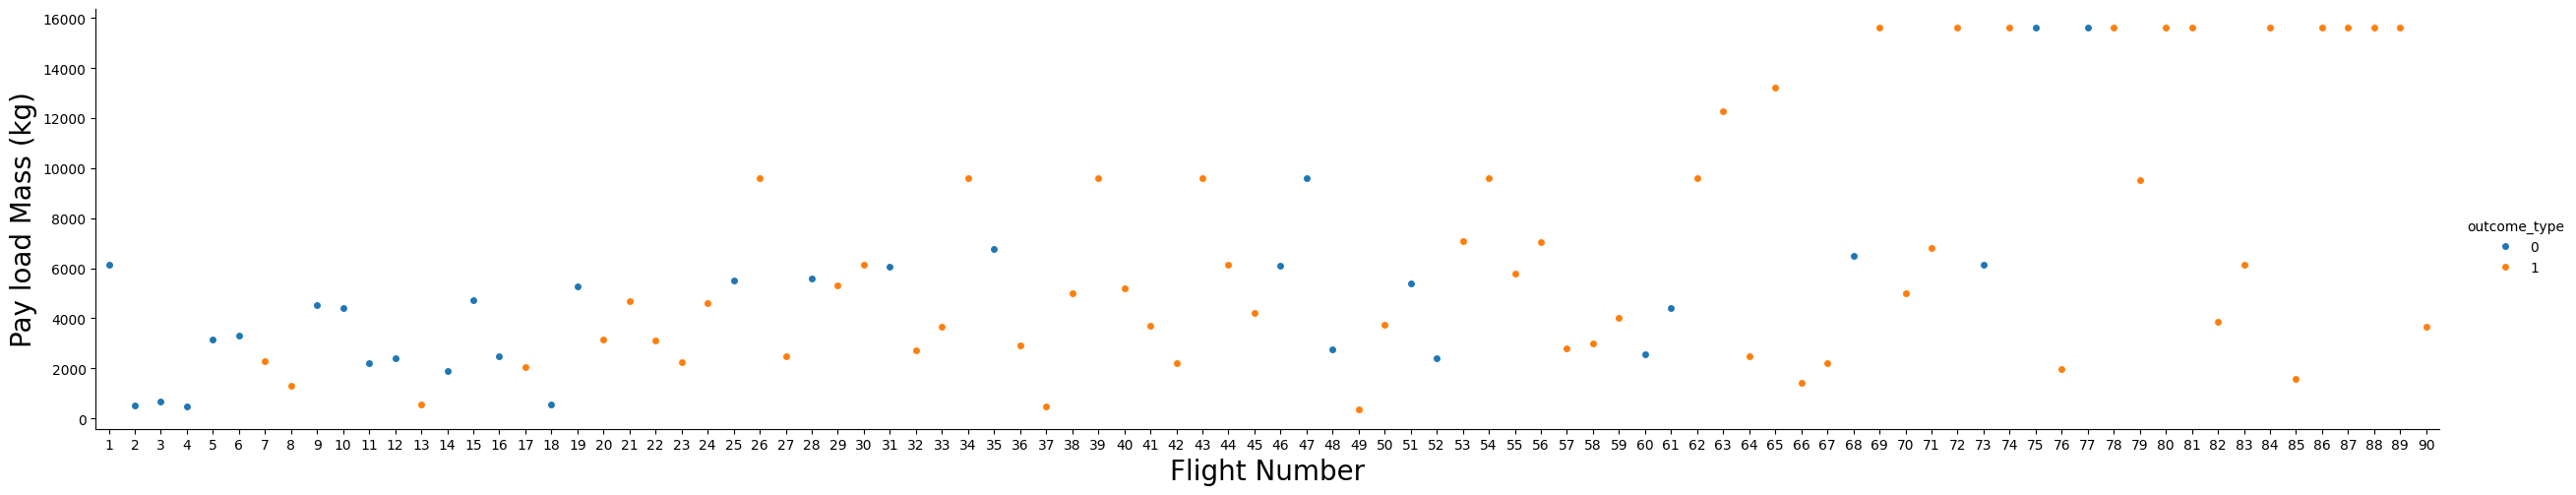

In [24]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="outcome_type", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

The graph above suggests a general trend of **increasing payload mass** with higher flight numbers, indicating advancements in **launch capabilities** or **payload design** over time.

However, there are also instances where payload mass:

- **Decreases**
- **Remains relatively constant**

These variations suggest fluctuations in **mission requirements** or **technological constraints**.

### Launch Site and Payload Mass

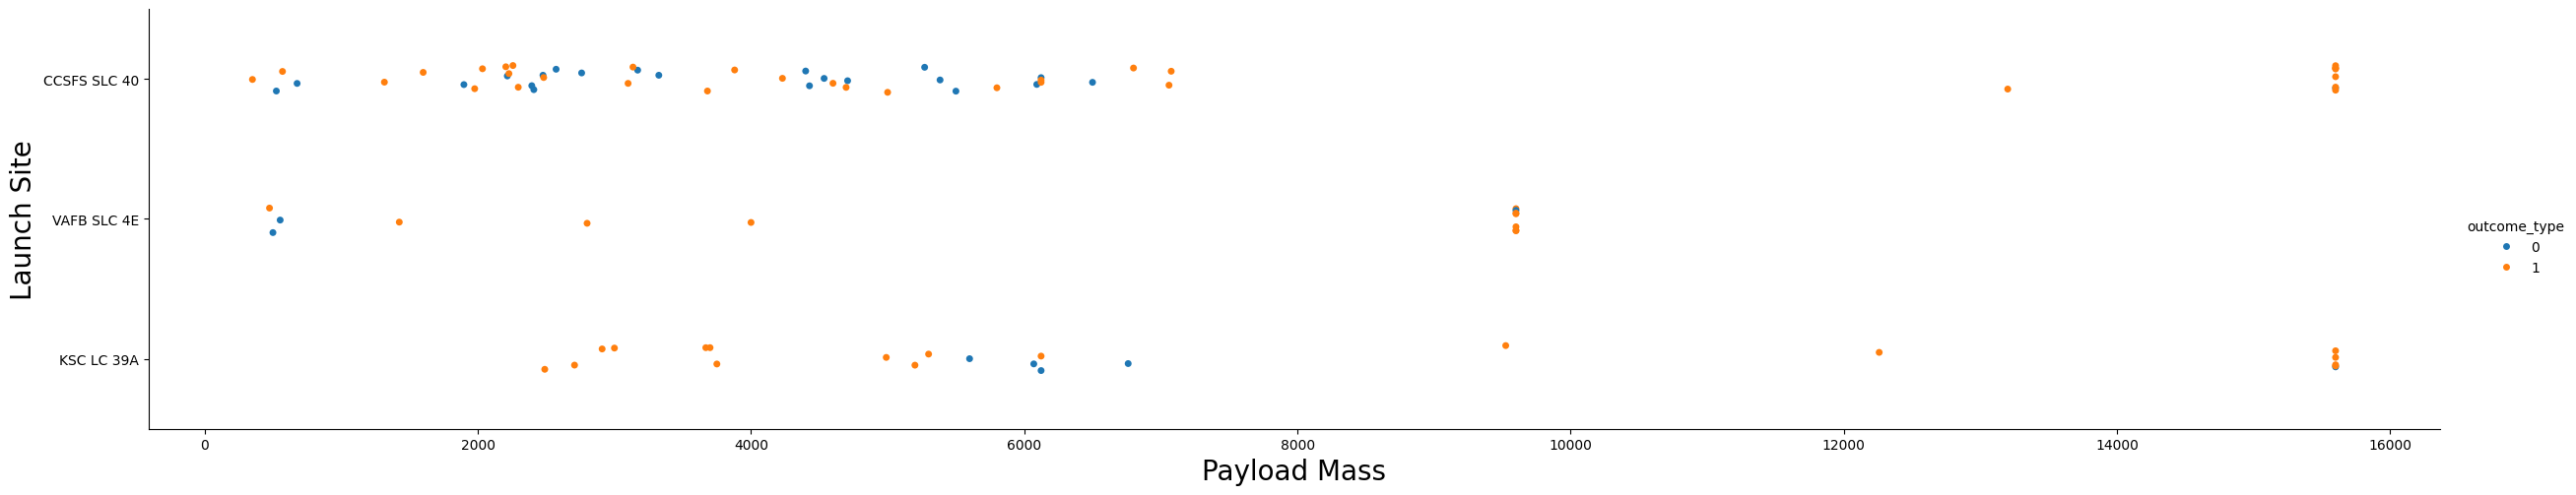

In [25]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="outcome_type", data=df, aspect = 5)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

From the plot, we can observe that:

- **CCSFS SLC 40** has handled launches of rockets with **greater mass**.
- In contrast, **KSC LC 39A** has primarily dealt with **medium mass rockets**.

This distinction highlights the differing capabilities and operational focuses of the two launch sites.

### Average Launch Success Rates by Orbit

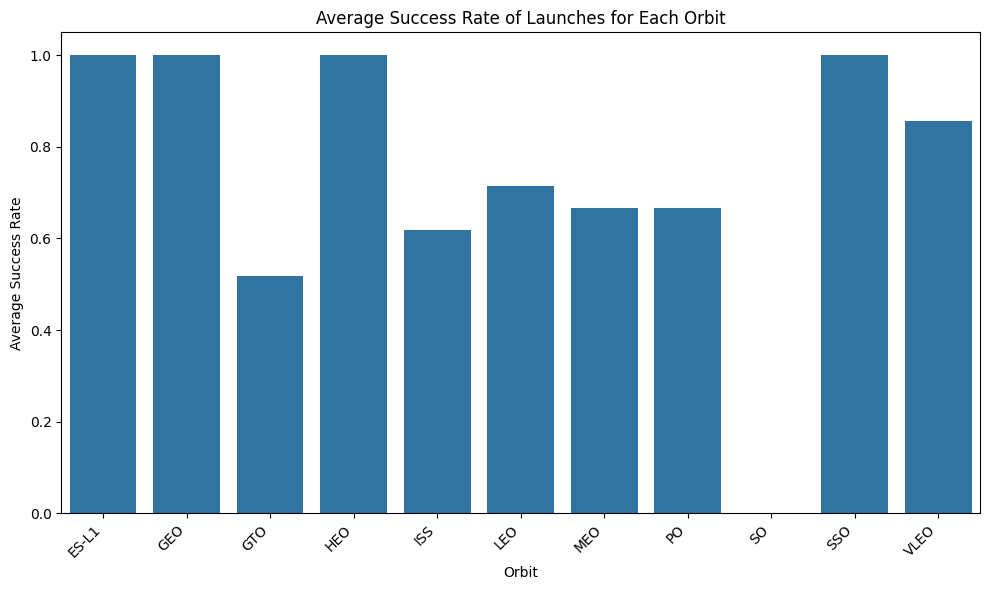

In [26]:
orbit_success_rate = df.groupby('Orbit')['outcome_type'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)
plt.xlabel('Orbit')
plt.ylabel('Average Success Rate')
plt.title('Average Success Rate of Launches for Each Orbit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This bar chart compares the **average success rates** of launches for different orbits:

- The highest success rate is for orbits labeled **"GEO."**
- This is followed by **"SSO," "GTO,"** and **"ISS."**
- In contrast, orbits like **"LEO," "VLEO,"** and **"PO"** have **lower average success rates.**

This analysis highlights the varying success rates associated with different orbital targets.

### Payload Mass and Orbit

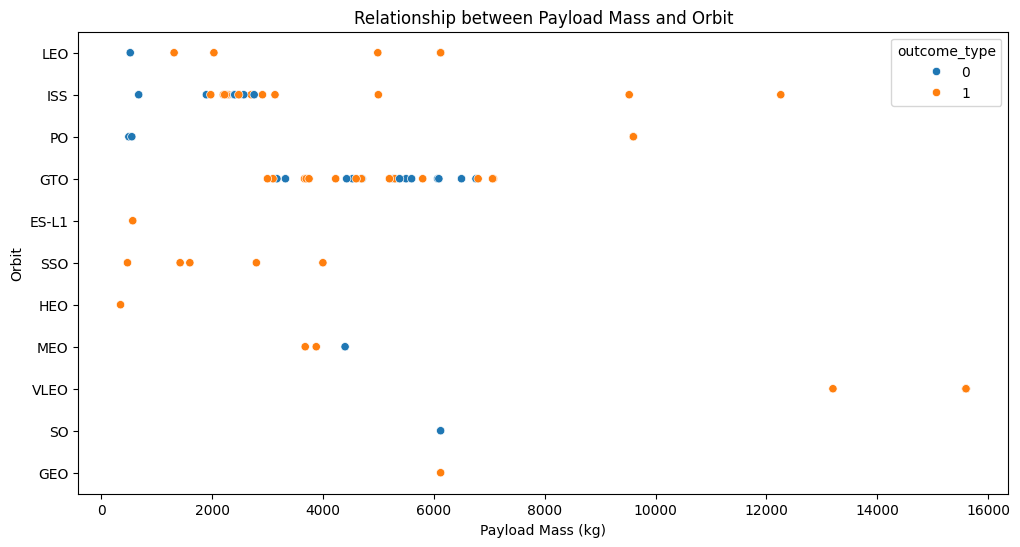

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='outcome_type', data=df)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.title('Relationship between Payload Mass and Orbit')
plt.show()

The plot illustrates the relationship between **payload mass** and the **target orbit** of the SpaceX launches.

- We can observe that certain orbits, such as **'GTO' (Geostationary Transfer Orbit)** and **'SSO' (Sun-synchronous Orbit)**, tend to have **heavier payloads** compared to others like **'LEO' (Low Earth Orbit)**.

This trend is likely due to the requirements of the mission and the specific characteristics of each orbit.

### Yearly Trend of Launch Success Rates

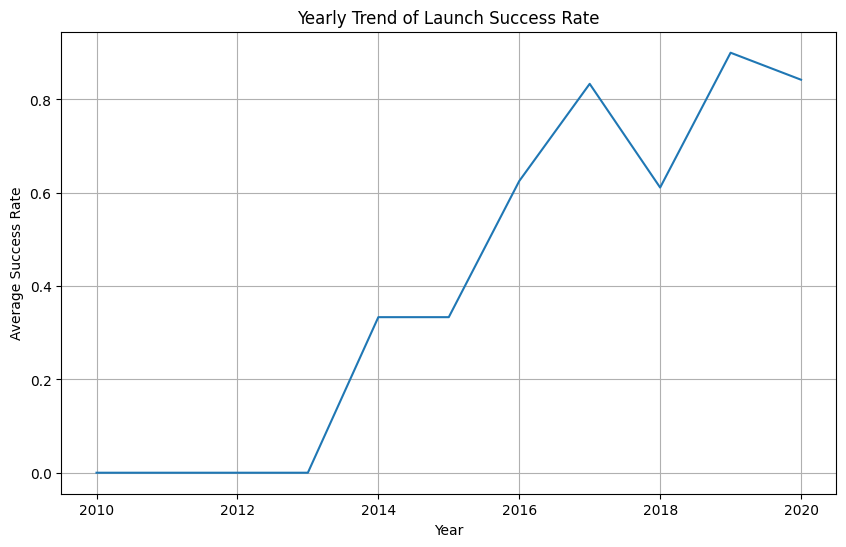

In [28]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

yearly_success_rate = df.groupby('Year')['outcome_type'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values)
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Yearly Trend of Launch Success Rate')
plt.grid(True)
plt.show()


The graph presents a **line chart** illustrating the yearly trend of **launch success rates**.

- **X-axis**: Represents the years from **2010 to 2020**.  
- **Y-axis**: Indicates the **average success rate**.

#### **Key Observations:**

- **Overall Trend**:
  - There's a general upward trend in launch success rates over the decade, suggesting improvements in launch technologies, procedures, and safety protocols.
  
- **Fluctuations**:
  - While the overall trend is positive, there are fluctuations in the success rates. Some years show a slight decrease, while others exhibit significant increases. These variations may be attributed to factors such as the complexity of missions, technological advancements, and unforeseen challenges.
  
- **Peak**:
  - The highest success rate appears to be around the year **2019**, followed by a slight decline in **2020**.


## Feature Engineering

1. **Verifying Information**:  Ensure the accuracy and completeness of the information in the dataframe.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 4 to 93
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  outcome_type    90 non-null     int64  
 1

2. **Removing Unwanted Columns**:  
   Drop the following columns to streamline the dataset for further modeling:
   - `Date`
   - `Outcome`
   - `Year`
   - `LandingPad`
   - `BosterVersion` (removed because it contains the same value, **Falcon 9**, for all rows)

In [30]:
df['LandingPad'].unique()

array([None, '5e9e3032383ecb761634e7cb', '5e9e3032383ecb6bb234e7ca',
       '5e9e3032383ecb267a34e7c7', '5e9e3033383ecbb9e534e7cc',
       '5e9e3032383ecb554034e7c9'], dtype=object)

In [31]:
features = df.drop(['Date', 'Outcome', 'Year',  'LandingPad'], axis=1)

In [32]:
features.drop(['BoosterVersion'], axis = 1, inplace=True)

In [33]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,outcome_type
4,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,B0003,-80.577366,28.561857,0
5,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,B0005,-80.577366,28.561857,0
6,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,1.0,0,B0007,-80.577366,28.561857,0
7,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,1.0,0,B1003,-120.610829,34.632093,0
8,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,1.0,0,B1004,-80.577366,28.561857,0


3. **Creating Dummy Variables**:  
   Generate dummy variables for categorical columns:
   - `Orbit`
   - `LaunchSite`

In [34]:
features['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [35]:
orbit_dummies = pd.get_dummies(features['Orbit'], prefix='Orbit', dtype=int)
features = pd.concat([features, orbit_dummies], axis=1)
features.drop(['Orbit'], axis=1, inplace=True)
features.head()


,FlightNumber,PayloadMass,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,...,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO
4,1,6123.547647,CCSFS SLC 40,1,False,False,False,1.0,0,B0003,...,0,0,0,0,1,0,0,0,0,0
5,2,525.000000,CCSFS SLC 40,1,False,False,False,1.0,0,B0005,...,0,0,0,0,1,0,0,0,0,0
6,3,677.000000,CCSFS SLC 40,1,False,False,False,1.0,0,B0007,...,0,0,0,1,0,0,0,0,0,0
7,4,500.000000,VAFB SLC 4E,1,False,False,False,1.0,0,B1003,...,0,0,0,0,0,0,1,0,0,0
8,5,3170.000000,CCSFS SLC 40,1,False,False,False,1.0,0,B1004,...,0,1,0,0,0,0,0,0,0,0


In [36]:
lsite_dummies = pd.get_dummies(features['LaunchSite'], prefix='LaunchSite', dtype=int)
features = pd.concat([features, lsite_dummies], axis=1)
features.drop(['LaunchSite'], axis=1, inplace=True)
features.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,...,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
4,1,6123.547647,1,False,False,False,1.0,0,B0003,-80.577366,...,0,1,0,0,0,0,0,1,0,0
5,2,525.000000,1,False,False,False,1.0,0,B0005,-80.577366,...,0,1,0,0,0,0,0,1,0,0
6,3,677.000000,1,False,False,False,1.0,0,B0007,-80.577366,...,1,0,0,0,0,0,0,1,0,0
7,4,500.000000,1,False,False,False,1.0,0,B1003,-120.610829,...,0,0,0,1,0,0,0,0,0,1
8,5,3170.000000,1,False,False,False,1.0,0,B1004,-80.577366,...,0,0,0,0,0,0,0,1,0,0


4. **Mapping Boolean Values**:  
   Convert `True` and `False` values to `1` and `0` for the following columns:
   - `ridFins`
   - `Reused`
   - `Legs`

In [37]:
boolMap = {
    False : 0,
    True : 1
}

features['GridFins'] = features['GridFins'].map(boolMap)
features['Reused'] = features['Reused'].map(boolMap)
features['Legs'] = features['Legs'].map(boolMap)

## Modelling

In [38]:
features.drop(['Serial'], axis = 1, inplace=True)

In [39]:
Y = df['outcome_type']
X = features.drop(['outcome_type'], axis = 1)

In [40]:
Y.head()

,outcome_type
4,0
5,0
6,0
7,0
8,0


In [41]:
X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Longitude', 'Latitude', 'Orbit_ES-L1',
       'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO',
       'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO',
       'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E'],
      dtype='object')

In [42]:
transform = preprocessing.StandardScaler()

In [43]:
X = transform.fit_transform(X)
X

array([[-1.71291154,  0.        , -0.65391284, ...,  0.79772404,
        -0.56879646, -0.4108907 ],
       [-1.67441914, -1.18972425, -0.65391284, ...,  0.79772404,
        -0.56879646, -0.4108907 ],
       [-1.63592675, -1.15742336, -0.65391284, ...,  0.79772404,
        -0.56879646, -0.4108907 ],
       ...,
       [ 1.63592675,  2.01380177,  3.49060516, ..., -1.25356634,
         1.75809815, -0.4108907 ],
       [ 1.67441914,  2.01380177,  1.00389436, ...,  0.79772404,
        -0.56879646, -0.4108907 ],
       [ 1.71291154, -0.51905572, -0.65391284, ...,  0.79772404,
        -0.56879646, -0.4108907 ]])

### Splitting
Splitting the standardized data into training and testing sets, with 80% of the data used for training and 20% for testing (specified by test_size=0.2)..

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((72, 24), (18, 24), (72,), (18,))

### Grid Search
- Defining a dictionary of machine learning models (models) that will be trained, including Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K-Nearest Neighbors (KNN).
- Also defining hyperparameter grids (param_grids) for each model to be used in a grid search for optimal parameter selection during model training.

In [45]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {
              'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

- Performing a grid search for each model using GridSearchCV to find the best hyperparameters based on cross-validation accuracy (cv=5).
- The best model, parameters, and scores are stored in their respective dictionaries.

In [46]:
best_estimators = {}
best_params = {}
best_scores = {}

for model_name in models.keys():
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(x_train, y_train)

    # Store the best model, parameters, and score
    best_estimators[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_

    # Print the results for each model
    print(f"{model_name} Best Score: {grid_search.best_score_}")
    print(f"{model_name} Best Parameters: {grid_search.best_params_}\n")

Logistic Regression Best Score: 0.8333333333333334
Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Support Vector Machine Best Score: 0.82
Support Vector Machine Best Parameters: {'C': 0.1, 'kernel': 'linear'}

Decision Tree Best Score: 0.8447619047619048
Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_split': 10}

K-Nearest Neighbors Best Score: 0.8476190476190476
K-Nearest Neighbors Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}



### Testing Unseen Data

In [47]:
finalmodel = KNeighborsClassifier(n_neighbors=7, weights='uniform')
finalmodel.fit(x_train, y_train)
y_pred = finalmodel.predict(x_test)
print("Accuracy: ", finalmodel.score(x_test, y_test))

Accuracy:  0.7777777777777778


In [48]:
finalmodel = DecisionTreeClassifier(max_depth=10, min_samples_split = 10)
finalmodel.fit(x_train, y_train)
y_pred = finalmodel.predict(x_test)
print("Accuracy: ", finalmodel.score(x_test, y_test))

Accuracy:  0.5555555555555556


In [49]:
finalmodel = SVC(C=0.1, kernel='linear')
finalmodel.fit(x_train, y_train)
y_pred = finalmodel.predict(x_test)
print("Accuracy: ", finalmodel.score(x_test, y_test))

Accuracy:  0.8333333333333334


In [50]:
finalmodel = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
finalmodel.fit(x_train, y_train)
y_pred = finalmodel.predict(x_test)
print("Accuracy: ", finalmodel.score(x_test, y_test))

Accuracy:  0.8333333333333334


The final models are trained and evaluated on the test set, resulting in the following accuracies:
- **K-Nearest Neighbors:** Accuracy of approximately `0.78`. This model performed the best during hyperparameter tuning.
- **Decision Tree:** Accuracy of approximately `0.61`. This indicates that the decision tree may not generalize well to unseen data.
- **Support Vector Machine:** Accuracy of approximately `0.83`, showing decent performance.
- **Logistic Regression:** Accuracy of approximately `0.83`, similar to the SVM.

**Results**
- **Best Model:** K-Nearest Neighbors with a validation score of approximately `0.85` during tuning but a slightly lower test accuracy of `0.78`.
- **Comparison of Models:** K-Nearest Neighbors performed the best during hyperparameter tuning, followed closely by the Support Vector Machine and Logistic Regression with similar accuracy on the test set.
- **Overfitting:** The lower test accuracy of K-Nearest Neighbors compared to the validation score suggests potential overfitting, indicating it may be too complex for the given data.

Overall, the results indicate that K-Nearest Neighbors is the most promising model based on validation scores, while careful monitoring of overfitting should be considered in further tuning.